In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [4]:
using Revise
includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 



In [60]:
using StatsBase, Distributions, Plots

In [42]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.57, .43]
X = [.12, .06]

er = expected_regimes(states_zero,transition_matrix, 5)


5×2 Matrix{Float64}:
 0.5705    0.4295
 0.570825  0.429175
 0.571036  0.428964
 0.571174  0.428826
 0.571263  0.428737

In [26]:
ST = [.67, .33]
St1 = [.67, .33]
St = [.6, .4]

St1 ./ ST
(transition_matrix' * St1 ./ ST) .* St

2-element Vector{Float64}:
 0.5691044776119403
 0.44181818181818183

In [27]:
smoother(er, transition_matrix)

5×2 Matrix{Float64}:
 0.637452  0.379095
 0.629977  0.384702
 0.618147  0.393574
 0.599732  0.407385
 0.571263  0.428737

In [43]:
test_regimes = simulate_regimes(states_zero, transition_matrix, 500, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, 500, 1)[:,:,1]'

500×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.155034   0.0800658
 0.163952   0.0275192
 0.220166   0.0995561
 0.201907   0.0507513
 0.208327   0.0952084
 0.116623   0.105064
 0.0927555  0.116318
 0.195612   0.127675
 0.303637   0.141714
 0.259262   0.127409
 ⋮          
 0.229816   0.0979638
 0.247348   0.150307
 0.24047    0.0973062
 0.156149   0.158224
 0.232722   0.134075
 0.153416   0.109314
 0.136452   0.120418
 0.156393   0.072168
 0.10504    0.169905

In [79]:
Y = collect(test_returns)
T = 500
p = 1
X = hcat(ones(T-1), Y[p:end-1,:])

initial_states = [(transition_matrix[2,1]/(transition_matrix[2,1]+ transition_matrix[1,2])), transition_matrix[1,2]/(transition_matrix[2,1]+ transition_matrix[1,2])]

est_regimes = hamilton_filter(Y[2:end,:], X, [Β1, Β2], [Σ1, Σ2], transition_matrix, initial_states)
smoothed_regimes = smoother(est_regimes, transition_matrix)


499×2 Matrix{Float64}:
 1.03861   0.0781872
 0.991199  0.113744
 1.10632   0.0274018
 1.07011   0.054559
 1.05087   0.0689936
 1.00103   0.106373
 1.02908   0.0853339
 0.988742  0.115587
 1.09443   0.036322
 1.02505   0.0883582
 ⋮         
 1.09915   0.0296369
 1.00093   0.102647
 1.09806   0.0260853
 0.888929  0.184127
 1.02198   0.0753426
 1.05711   0.0377761
 1.00106   0.0690238
 1.01379   0.0327576
 0.417997  0.582003

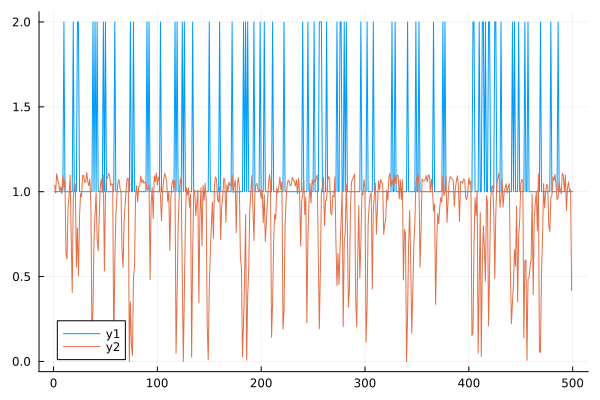

In [80]:
plot(test_regimes[:,1])
plot!(smoothed_regimes[:,1])


In [81]:
sum(smoothed_regimes, dims=2)

499×1 Matrix{Float64}:
 1.1167947371755962
 1.104942606738969
 1.1337231937064753
 1.124670806117177
 1.1198592611820404
 1.1073994332074868
 1.1144125123128552
 1.1043283029382187
 1.1307498189041265
 1.113404396136355
 ⋮
 1.1287914243102726
 1.1035794412098008
 1.1241434866703106
 1.0730564601596262
 1.097321153804152
 1.0948908192797955
 1.0700870024180582
 1.0465518298223262
 1.0

In [99]:
smoothed_regimes[end,:]

2-element Vector{Float64}:
 0.4179974827533813
 0.5820025172466187

In [104]:
transition_matrix * smoothed_regimes[end-1,:]

2-element Vector{Float64}:
 0.8666387236674473
 0.22896493597720516

In [113]:
ST = est_regimes[end,:]
Stm1 = est_regimes[end-1,:]
Stm2 = est_regimes[end-2,:]


1.0

In [116]:


r = transition_matrix' * (ST ./ ST) .* Stm1
display(r)
sum(r)

2-element Vector{Float64}:
 1.0137942131344264
 0.032757616687899824

1.0465518298223262

#TODO 
- sas

In [117]:

#TODO 
#- naprawić smoother
#-zrobić własne obliczenia predict dla h+2 : Xt st1 * b1 * proba st1 * transition_matrix + xt st2 * b1 * prob st2 * transition matrix
#reorganizować kod i testy, wdrożyć jakieś normalne środowisko

UndefVarError: UndefVarError: `naprawić` not defined in `Main`
Suggestion: check for spelling errors or missing imports.